In [1]:
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
pip install cv2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
image=cv2.imread('./1_865.jpg')
confidences=0.5
thershold=0.5


<function matplotlib.pyplot.show(close=None, block=None)>

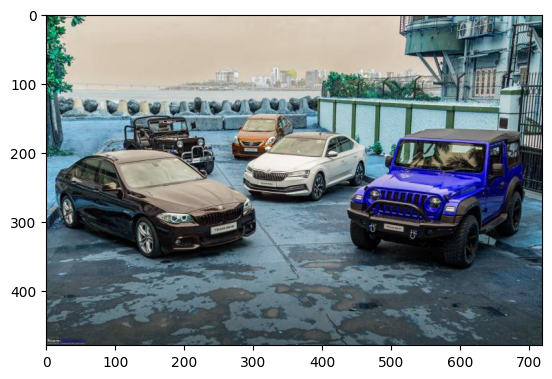

In [5]:
plt.imshow(image)
plt.show

In [6]:
LABELS = open('./coco.names').read().strip().split("\n")

In [7]:
LABELS

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [8]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

In [9]:
COLORS.shape

(80, 3)

In [10]:
weightsPath = "./yolov3-tiny.weights"
configPath = "./yolov3-tiny.cfg"

In [11]:
image.shape[0:2]

(480, 720)

In [12]:
model = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [13]:
H, W = image.shape[0:2]

In [14]:
ln= model.getLayerNames()

In [15]:
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'pool_1',
 'conv_2',
 'bn_2',
 'leaky_3',
 'pool_3',
 'conv_4',
 'bn_4',
 'leaky_5',
 'pool_5',
 'conv_6',
 'bn_6',
 'leaky_7',
 'pool_7',
 'conv_8',
 'bn_8',
 'leaky_9',
 'pool_9',
 'conv_10',
 'bn_10',
 'leaky_11',
 'pool_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'leaky_19',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'leaky_22',
 'conv_22',
 'permute_23',
 'yolo_23')

In [16]:
model.getUnconnectedOutLayers()[1]


48

In [17]:
ln = [ln[i - 1] for i in model.getUnconnectedOutLayers()]

In [18]:
ln

['yolo_16', 'yolo_23']

In [19]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)

In [29]:
image.shape

(480, 720, 3)

In [30]:
blob.shape

(1, 3, 416, 416)

In [31]:
b=blob.reshape(1,416,416,3)

In [20]:
model.setInput(blob)

In [21]:
layerOutputs = model.forward(ln)

In [22]:
layerOutputs[0]

array([[0.05959608, 0.04513443, 0.20378874, ..., 0.        , 0.        ,
        0.        ],
       [0.03876209, 0.04362506, 0.21646419, ..., 0.        , 0.        ,
        0.        ],
       [0.03639427, 0.04375879, 0.7997829 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9474818 , 0.9557914 , 0.18054533, ..., 0.        , 0.        ,
        0.        ],
       [0.95870113, 0.9525792 , 0.1963315 , ..., 0.        , 0.        ,
        0.        ],
       [0.9675631 , 0.95651776, 0.7373584 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [23]:
boxes = []
confidencees = []
classIDs = []

In [24]:
for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    classID = np.argmax(scores)
    confidence = scores[classID]
    if confidence > confidences:
      box = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = box.astype("int")
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))
      boxes.append([x, y, int(width), int(height)])
      confidencees.append(float(confidence))
      classIDs.append(classID)


In [25]:
idxs = cv2.dnn.NMSBoxes(boxes, confidencees, confidences,
	thershold)

In [26]:
idxs

array([6, 0, 3, 5, 2])

In [27]:
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidencees[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)

In [28]:
cv2.imshow("Image", image)
cv2.waitKey(0)


-1